In [1]:
import sys
import os
sys.path.append('../../protein_bert')
sys.path.append('..')

In [2]:
import numpy as np

In [3]:
from proteinbert import load_pretrained_model
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs

pretrained_model_generator, input_encoder = load_pretrained_model()

2024-07-14 07:54:53.017477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-14 07:54:53.509677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-14 07:54:53.512952: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-14 07:54:54.303758: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-14 07:54:58.629805: W tensorflow/compiler/tf

In [22]:
# seq = ['GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP']
seq = ['GEIEIALATIXRELLNVEQVGRXDSFXALXGHSLLAVRXIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP']
seq_len = len(seq[0]) + 2

In [23]:
seq_len

72

In [24]:
model = pretrained_model_generator.create_model(seq_len)
model_hidden = get_model_with_hidden_layers_as_outputs(model)

In [25]:
encoded_x = input_encoder.encode_X(seq, seq_len)

In [26]:
encoded_x

[array([[23,  5,  3,  7,  3,  7,  0,  9,  0, 16,  7, 20, 14,  3,  9,  9,
         11, 18,  3, 13, 18,  5, 14, 20,  2, 15,  4, 20,  0,  9, 20,  5,
          6, 15,  9,  9,  0, 18, 14, 20,  7,  3, 14,  9, 14, 14,  7,  5,
          9,  5,  9, 15, 18, 13, 16,  9,  4, 13,  6, 12, 16,  9, 15, 18,
          9,  0, 13, 15,  9, 18, 12, 24]], dtype=int32),
 array([[0, 0, 0, ..., 0, 0, 0]], dtype=int8)]

In [27]:
pred = model.predict(encoded_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step


In [28]:
from proteinbert import tokenization

In [29]:
tokenization.index_to_token

{0: 'A',
 1: 'C',
 2: 'D',
 3: 'E',
 4: 'F',
 5: 'G',
 6: 'H',
 7: 'I',
 8: 'K',
 9: 'L',
 10: 'M',
 11: 'N',
 12: 'P',
 13: 'Q',
 14: 'R',
 15: 'S',
 16: 'T',
 17: 'U',
 18: 'V',
 19: 'W',
 20: 'X',
 21: 'Y',
 22: '<OTHER>',
 23: '<START>',
 24: '<END>',
 25: '<PAD>'}

In [30]:
pred[0].shape

(1, 72, 26)

In [31]:
for token in np.argmax(pred[0], axis=2):
    print(''.join(
        [tokenization.index_to_token[k] for k in token]
    ))

<START>GEIEIALATIXRELLNVEQVGRXDSFXALXGHSLLAVRXIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP<END>


In [32]:
seq

['GEIEIALATIXRELLNVEQVGRXDSFXALXGHSLLAVRXIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP']

In [16]:
for item in pred[0]:
    for logits in item:
        print(logits)
        # print(''.join(
        #     [tokenization.index_to_token[k] for k in token]
        # ))

[2.2884465e-03 1.4455698e-04 4.5875404e-03 3.4738637e-03 3.2591628e-04
 1.6740015e-03 2.3123426e-03 9.5360726e-04 8.3861715e-04 8.1742732e-03
 1.8558096e-03 1.1034927e-03 2.7738614e-03 2.7988984e-03 2.3225013e-03
 5.1702084e-03 1.9963279e-03 5.8546021e-08 9.0547762e-04 9.9012614e-05
 8.3280220e-06 5.1415368e-04 2.8701388e-06 9.5566118e-01 1.4572570e-05
 2.7007657e-11]
[1.51861331e-03 9.86524246e-05 1.73625792e-03 2.71087815e-03
 2.43441420e-04 9.41488147e-01 5.37876796e-04 7.85526878e-04
 6.22178195e-04 1.99327385e-03 3.59808616e-02 5.22957125e-04
 2.62298528e-03 2.32867361e-03 1.86034327e-03 1.65877002e-03
 1.55975332e-03 5.96583420e-18 1.24555314e-03 1.04836836e-04
 3.16700630e-06 3.75584117e-04 1.17371575e-12 1.20576624e-06
 4.89789784e-07 5.03999564e-10]
[8.0416159e-04 3.4177468e-05 9.7680709e-04 9.8838937e-01 4.9110015e-05
 3.5641858e-04 4.2459022e-04 1.1372907e-04 3.7489616e-04 2.7411987e-04
 7.5788645e-05 4.0348052e-04 1.1964741e-03 8.4987719e-04 7.5479108e-04
 2.7583451e-03 1.8

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'prob')

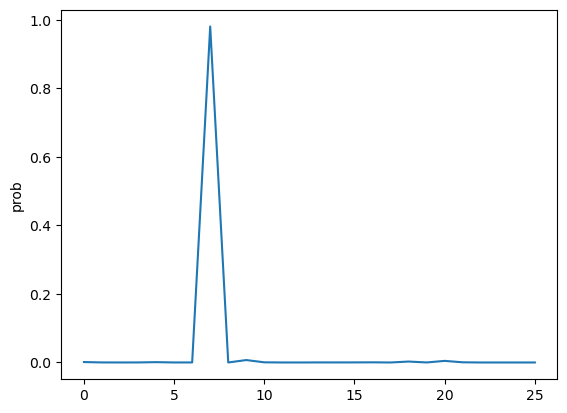

In [34]:
plt.plot(pred[0][0][10])
plt.ylabel('prob')
# plt.yscale('log')